<a href="https://colab.research.google.com/github/NANDINIKeremegaladhoddiShivalingaiah/Airbnb-Exploratory-Data-Analysis-EDA-/blob/main/Airbnb_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Airbnb_NYC-Exploartory Data Analysis**


 **Project Type** - EDA

**Contribution** - Individual

**NAME** - NANDINI K S

#**Project Summary -**

**Data Preprocessing :**

1. Getting the dataset

2. Importing libraries

3. Loading datasets

4. About the Dataset

5. Understand the Variable

6. Data Exploration and Data Cleaning

5.Encoding Categorical Data

6.Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**


# **GitHub Link -**

https://github.com/NANDINIKeremegaladhoddiShivalingaiah/Airbnb-Exploratory-Data-Analysis-EDA-

# **Problem Statement**

1. Find the most popular neighborhoods for Airbnb rentals in New York City and How do prices and availability vary by neighborhood?

2. Finding the trends in terms of the number of listings, prices, or occupancy rates.

3. Which types of properties more popular or more expensive than others?

4.   Finding the correlation between price and other factors. 

5.   Which is the best area in New York City for a host to buy property at a good price rate and in an area with high traffic ?

6.   How do the minimum night of stay vary by neighborhood?

7.   How do the reviews of Airbnb rentals in New York City compare to their prices? Are higher-priced rentals more likely to have higher ratings?

8. Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.

9. Find the most reviewed room type in Neighborhood groups per month.

10. Find the top location listing location for travelers.

# **Data Overview**

id - unique_ID

name - names of the listing

host_id - unique host_Id

host_name - name of the listers

neighbourhood_group - location

neighbourhood - area

latitude - GPS cordinates

longitude - GPs cordinates

room_type - types of listing

price - price of listing

minimum_nights - minumum no of nights to be pay

number_of_reviews - number of reviews

last_review - last reviewed date

reviews_per_month - total reviews per month

calculated_host_listings_count - Total no of listing by host

# **Let's Begin !**

# **1. Know Your Data**

# Import Libraries

In [1]:
# Importing necessary libraries for analysing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from statistics import mean

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading Dataset
path = '/content/drive/MyDrive/Colab Notebooks/Projects-DATASCIENCE/EDA-AIRBNB/Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(path)

### Dataset First View

In [4]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [5]:
airbnb_df.shape

(48895, 16)

### Dataset Information

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Duplicate Values

In [7]:
#Finding duplicate values in dataset
airbnb_df.duplicated().sum()

0

In [8]:
print(f' We have {airbnb_df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


### Missing Values/Null Values

In [9]:
# Finding a Missing Values/Null Values in dataset
print(f'The number of missing values after cleaning the data are:')
airbnb_df.isna().sum().sort_values(ascending=False)

The number of missing values after cleaning the data are:


last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

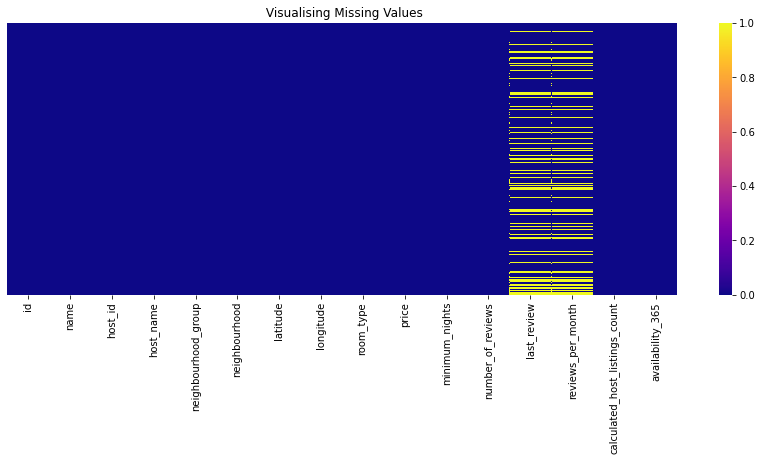

In [10]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(airbnb_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

The features like last_reviews and reviews_per_month have highest null values in the dataset. So we can drop those column as they are not sharing any useful data. since id's and names both are available.

host_name and listing_name doesn't have more missing/null values, Hence we can fill missing/null values with substitute as 'Missedvalue' in both the columns.

In [11]:
# Filling missing values
airbnb_df['name'].fillna('Missedvalue', inplace = True)
airbnb_df['host_name'].fillna('Missedvalue', inplace =  True)

In [12]:
# Dropping the unncessary columns.
airbnb_df_new = airbnb_df.drop(['last_review','reviews_per_month'], axis =1)
airbnb_df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [13]:
# Checking for null values in the new dataset
print(f'The number of missing values after cleaning the data are:')
airbnb_df_new.isnull().sum()

The number of missing values after cleaning the data are:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

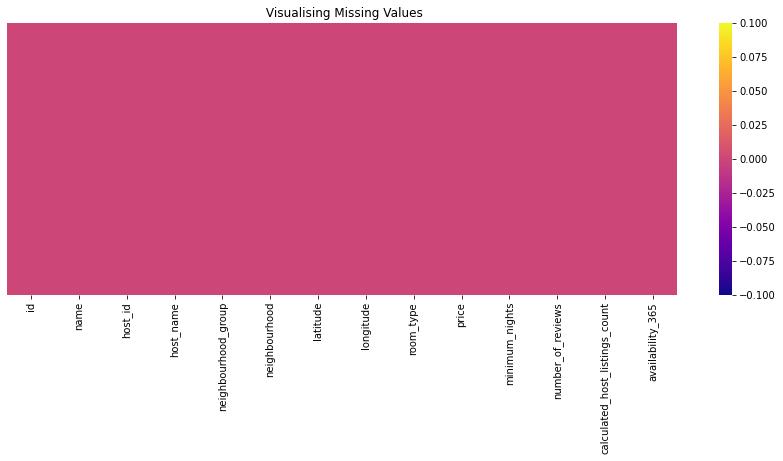

In [14]:
# Visualizing the missing values in the new dataset
plt.figure(figsize=(15,5))
sns.heatmap(airbnb_df_new.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

Now, we don't have any missing values.

## **2. Understanding Your Variables**

In [15]:
# checking the features name
print(f' The names of the features present in the dataset are: ')
list(airbnb_df_new.columns)

 The names of the features present in the dataset are: 


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

In [16]:
#Checking for categorical columns
categorical_columns = airbnb_df_new.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: {list(categorical_columns)}')

 The following are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [17]:
# Checking for numeric/ non categorical columns
numerical_columns = airbnb_df_new.select_dtypes(exclude = 'object').columns
print(' The following are the non categorical features in the dataset:') 
list(numerical_columns)

 The following are the non categorical features in the dataset:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

### Check Unique Values for each variable.

In [18]:
#Checking the Unique value
print('The Unique Values of neighbourhood_group', airbnb_df_new['neighbourhood_group'].unique())
print('The Unique Values of room_type', airbnb_df_new['room_type'].unique())

The Unique Values of neighbourhood_group ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
The Unique Values of room_type ['Private room' 'Entire home/apt' 'Shared room']


# **Describe the Dataset and removing the outliers**

In [19]:
# Dataset Describe
airbnb_df_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


The summary statistics shows us that the average price is 152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing. We also learnt that a host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.

Most importantly, the min price is showing as zero and the max price as 10,000. Something isn't right with the data, so need to look into this issue and check for outliers.

About the Dataset – Airbnb Bookings
This Airbnb dataset contains nearly 49,000 observations from New York , with 16 columns of data.

The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

This dataset contains information about Airbnb bookings in New York City in 2019. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the NYC.

In [20]:
#checking for outliers
airbnb_df_new.agg({'price':['mean','median','max','count']})

,price
mean,152.720687
median,106.000000
max,10000.000000
count,48895.000000


Previously we observed that the minimum value is zero, which does not make any sense since there are no free rooms on Airbnb and the maximum value is 10,000, which just seems too high. Notice how the mean is considerably higher than the median. This is an indication that the data is skewed.

Let's use a boxplot to get a better understanding of price distribution:

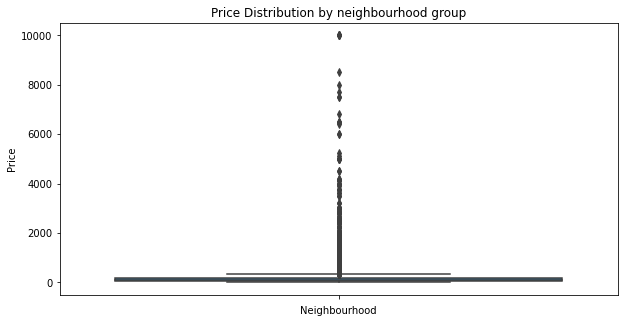

In [21]:
# Lets create a box plot to check the outliers
plt.figure(figsize=(10,5))
sns.boxplot(y=airbnb_df_new['price'])
sns.set_theme(style='white')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price Distribution by neighbourhood group')
plt.show()

From the above box plot we can observe that the outliers are present in the data. Hence will remove the outliers using interquartile range.

In [22]:
#Using IQR technique
q1 = airbnb_df['price'].quantile(0.25)
q3 = airbnb_df['price'].quantile(0.75)
iqr = q3-q1
lower_fence = q1-1.5*iqr
higher_fence = q3+1.5*iqr
print('q1 is', q1)
print('q3 is', q3)
print('The lower_fence is ', lower_fence)
print('The higher_fence is ', higher_fence)

q1 is 69.0
q3 is 175.0
The lower_fence is  -90.0
The higher_fence is  334.0


In [23]:
#Removing the values below lower_fence and above higher_fence
airbnb_df_new = airbnb_df_new.drop(airbnb_df_new[airbnb_df_new['price']<lower_fence].index)
airbnb_df_new = airbnb_df_new.drop(airbnb_df_new[airbnb_df_new['price']>higher_fence].index)

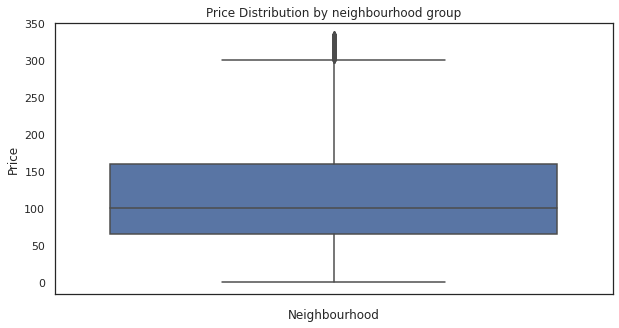

In [24]:
#Lets create a new boxplot and check the result
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_df_new)
sns.set_theme(style='white')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price Distribution by neighbourhood group')
plt.show()

# **3. Data Wrangling**

In [25]:
# Number of listing in each neighbourhood_group of the Airbnb NYC dataset

number_of_airbnb_listed = airbnb_df_new['neighbourhood_group'].value_counts().reset_index()
number_of_airbnb_listed.columns = ['Neighbourhood_Groups', 'Listing_Counts']
number_of_airbnb_listed.head()

,Neighbourhood_Groups,Listing_Counts
0,Manhattan,19506
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


In [26]:
# Top 10 Neighborhoods in the Airbnb NYC dataset based on the number of listings

top_neighborhoods =airbnb_df_new['neighbourhood'].value_counts()[:10].reset_index()
top_neighborhoods.columns = ['Top_Neighbourhoods', 'Listing_Counts']
top_neighborhoods

,Top_Neighbourhoods,Listing_Counts
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1144


In [27]:
# Top 10 hosts in the Airbnb NYC dataset based on the number of listings of each host
top_10_hosts = airbnb_df_new['host_name'].value_counts()[:10].reset_index()
top_10_hosts.columns = ['host_name', 'Total_listings']
top_10_hosts

,host_name,Total_listings
0,Michael,383
1,David,368
2,John,276
3,Sonder (NYC),272
4,Alex,253
5,Sarah,221
6,Daniel,212
7,Maria,197
8,Jessica,185
9,Mike,184


In [28]:
# Number of Active Hosts in each neighbourhood groups
hosts_per_location = airbnb_df_new.groupby('neighbourhood_group')['id'].count().reset_index().rename(columns = {'id': 'Host_counts'}).sort_values(by= 'Host_counts', ascending = False)
hosts_per_location

,neighbourhood_group,Host_counts
2,Manhattan,19506
1,Brooklyn,19415
3,Queens,5567
0,Bronx,1070
4,Staten Island,365


In [29]:
# Average Price Of Airbnb in each Neighbourhood Group
average_price = airbnb_df_new.groupby(['neighbourhood_group'])['price'].mean().reset_index().rename(columns = {'price':'Avg_price'}).sort_values(by='Avg_price', ascending = False)
average_price.head()

,neighbourhood_group,Avg_price
2,Manhattan,145.952835
1,Brooklyn,105.699614
4,Staten Island,89.235616
3,Queens,88.904437
0,Bronx,77.365421


In [30]:
# Average price of Airbnb in each neighborhood
neighbourhood_avg_price = airbnb_df_new.groupby(['neighbourhood'])['price'].mean().reset_index().rename(columns = {'price':'Avg_price'}).sort_values(by='Avg_price').head(10)
neighbourhood_avgprice_group = neighbourhood_avg_price.join(airbnb_df_new[['neighbourhood', 'neighbourhood_group']].drop_duplicates().set_index('neighbourhood'), on='neighbourhood')
neighbourhood_avgprice_group

,neighbourhood,Avg_price,neighbourhood_group
27,Bull's Head,47.333333,Staten Island
101,Hunts Point,50.500000,Bronx
195,Tremont,51.545455,Bronx
178,Soundview,53.466667,Bronx
50,Corona,54.412698,Queens
140,New Dorp,57.000000,Staten Island
24,Bronxdale,57.105263,Bronx
141,New Dorp Beach,57.400000,Staten Island
87,Grant City,57.666667,Staten Island
46,Concord,58.192308,Staten Island


In [31]:
# creating a dataframe for average price of Airbnb in each neighbourhood wrt lalitude and logitude for visualization

neighbourhood_avgprice_coordinates = airbnb_df_new.groupby(['neighbourhood'])['price'].mean()
neighbourhood_prices = pd.DataFrame({"neighbourhood": neighbourhood_avgprice_coordinates.index, "avg_price": neighbourhood_avgprice_coordinates.values})
Avgprice_coordinates_df = airbnb_df_new.merge(neighbourhood_prices, on="neighbourhood")


In [32]:
# Reviews on neighbourhood group
reviews_by_neighbourhood_group = airbnb_df_new.groupby("neighbourhood_group")["number_of_reviews"].sum()


In [33]:
# Minimum night stay requirement
def minimum_night_cat(x):
  if x==1:
    return 'one day'
  elif x>1 and x<=3:
    return '2-3 days'
  elif x>3 and x<7:
    return 'few days'
  elif x==7:
    return '1 week'
  elif x>7 and x<=29:
    return 'less than 1 month'
  elif x==30:
    return '1 month'
  elif x>30 and x<180:
    return 'more than a month'
  elif x>=180 and x<=365:
    return 'more than half year'
  else :
    return 'more than a year'
airbnb_df_new['minimum_night_cat']=airbnb_df_new['minimum_nights'].apply(minimum_night_cat)

data=pd.DataFrame(airbnb_df_new.groupby(['minimum_night_cat'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count',ascending=False))
data

,minimum_night_cat,count
2,2-3 days,18455
8,one day,12067
3,few days,6566
0,1 month,3493
4,less than 1 month,2705
1,1 week,1951
5,more than a month,578
7,more than half year,95
6,more than a year,13


# **4. Data Visualisation**

## **1. Correlation heat map**

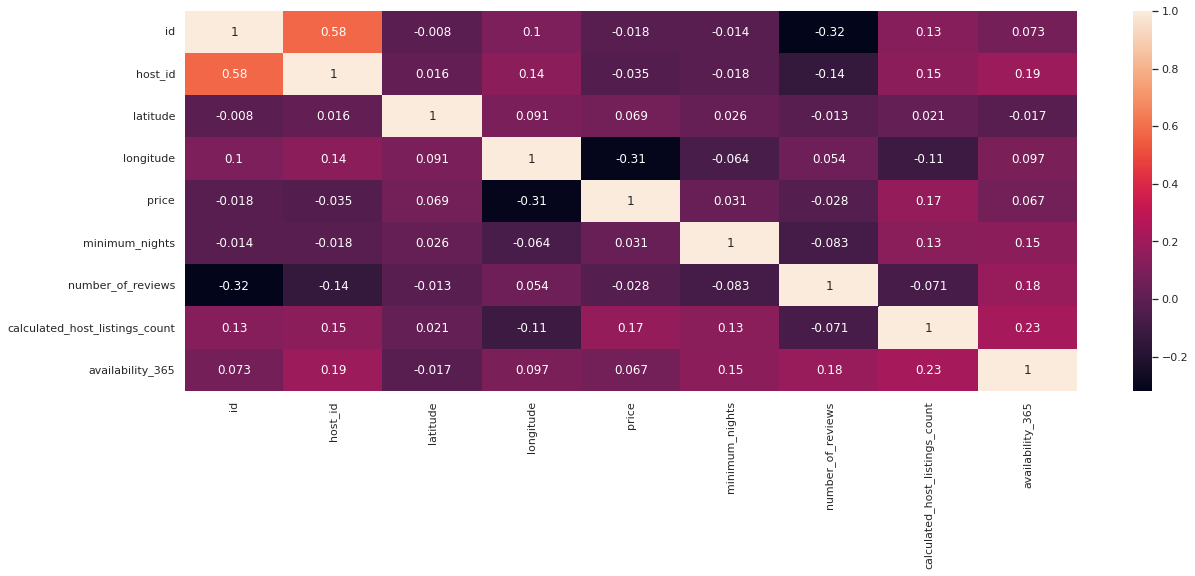

In [34]:
# correlation plot for visualization on each features
plt.figure(figsize=(20,7))
corr_=airbnb_df_new.corr()
sns.heatmap(corr_,annot=True)

1. Why did you pick the specific chart?

Heatmap is used to visualize the correlation between different features of a dataset. It is a matrix plot where each cell is filled with a color that represents the correlation coefficient between the two variables corresponding to the row and column of that cell.

2. What is/are the insight(s) found from the chart?

only review per month and number of reviews are correlated remaning columns are not correlated with each other.

There is a moderate positive correlation (0.58) between the host_id and id columns, which suggests that hosts with more listings are more likely to have unique host IDs.

There is a weak positive correlation (0.17) between the price column and the calculated_host_listings_count column, which suggests that hosts with more listings tend to charge higher prices for their listings.

There is a moderate positive correlation (0.23) between the calculated_host_listings_count column and the availability_365 column, which suggests that hosts with more listings tend to have more days of availability in the next 365 days.

There is a strong positive correlation (0.58) between the number_of_reviews column and the reviews_per_month column, which suggests that listings with more total reviews tend to have more reviews per month.

## **2. Distribution Of Airbnb Bookings Price Range Using Histogram**

Text(0.5, 1.0, 'Distribution of Airbnb Prices')

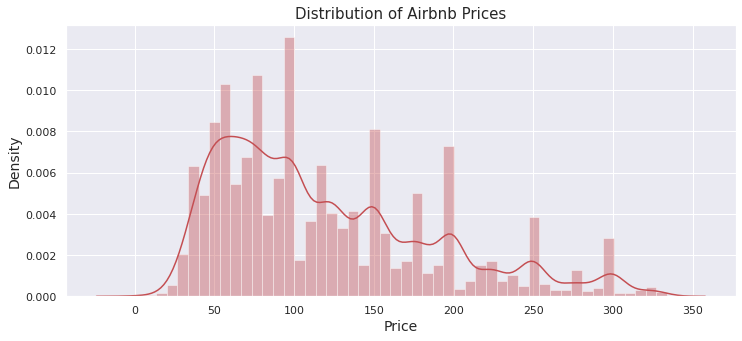

In [35]:
#Visualizing the price of the Airbnb using histogram
plt.figure(figsize=(12, 5))
sns.set_theme(style='darkgrid')
sns.distplot(airbnb_df_new['price'],color=('r'))
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Airbnb Prices',fontsize=15)

observations -->

The range of prices being charged on Airbnb appears to be from 20 to 330 dollars , with the majority of listings falling in the price range of 50 to 150 dollars.

The distribution of prices appears to have a peak in the 50 to 150 dollars range, with a relatively lower density of listings in higher and lower price ranges.

There may be fewer listings available at prices above 250 dollars, as the density of listings drops significantly in this range.

## **3. Price Distribution On Each Neighborhood Group**

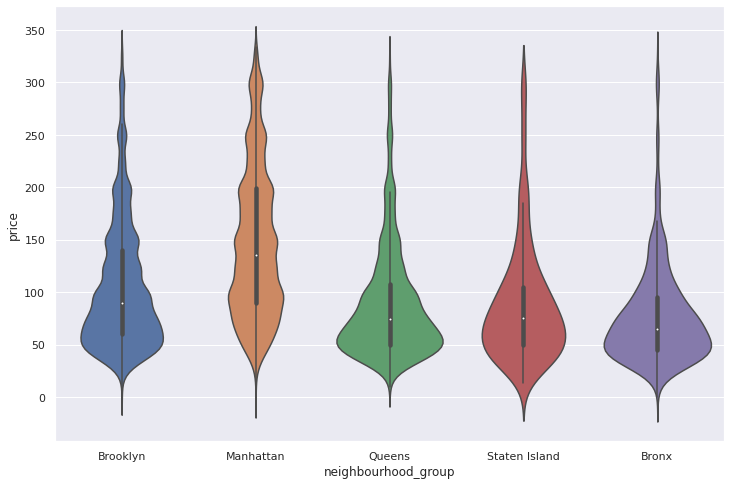

In [36]:
# visualizing the price distribution in each Neighbourhood_groups using violin plot
plt.figure(figsize=(12,8))
sns.violinplot(x=airbnb_df_new['neighbourhood_group'],y=airbnb_df_new['price'])

Observations -->

price distribution is very high in Manhattan and Brooklyn. but Manhattan have more Diversity in price range, you can see in violin plot.

Queens and Bronx have same price distribution but in Queens area more distribution in 50 to100  but diversity in price is not like Manhattan and Brooklyn
The range of prices for accommodations in Manhattan is particularly high, indicating that it is the most expensive place to stay in NYC due to its various attractive amenities, as shown in the attached image.

they are likely to attract a lot of tourists or visitors because of more valuable things to visit so price is higher than other neighbourhood groups.

Travelers are likely to spent more days in this area because of popular amenities, high concentration of tourist attractions and public transports

## **4. Average Price Of Each Neighborhood Group**

In [38]:
average_price

,neighbourhood_group,Avg_price
2,Manhattan,145.952835
1,Brooklyn,105.699614
4,Staten Island,89.235616
3,Queens,88.904437
0,Bronx,77.365421


Text(0.5, 1.0, 'Average Price by Neighbourhood Group')

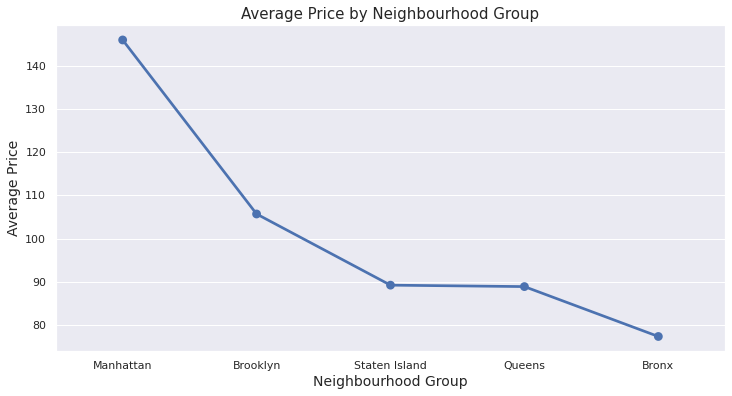

In [40]:
# visualizing the average_price of each neighbourhood group using point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x = average_price['neighbourhood_group'], y=average_price['Avg_price'])
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)

Observations -->

The average price of a listing in New York City varies significantly across different neighborhoods, with Manhattan having the highest 146 dollars/day average price and the Bronx having the lowest near 77 dollars/day.

In second graph price distribution is very high in Manhattan and Brooklyn. but Manhattan have more varity in price range, you can see in second violinplot.

The average price increases as you move from the outer boroughs (Bronx, Brooklyn, Queens, and Staten Island) towards the center of the city (Manhattan).

The average price in queens and Staten Island is relatively similar, despite being in different parts of the city.

The data suggests that the overall cost of living in New York City is higher in the center of the city (Manhattan) compared to the outer boroughs. This is likely due to the fact that Manhattan is the most densely populated and commercially important borough, and therefore has higher demand for housing in the centrally located neighborhoods

## **5. Average Minimum Price In each Neighborhoods**

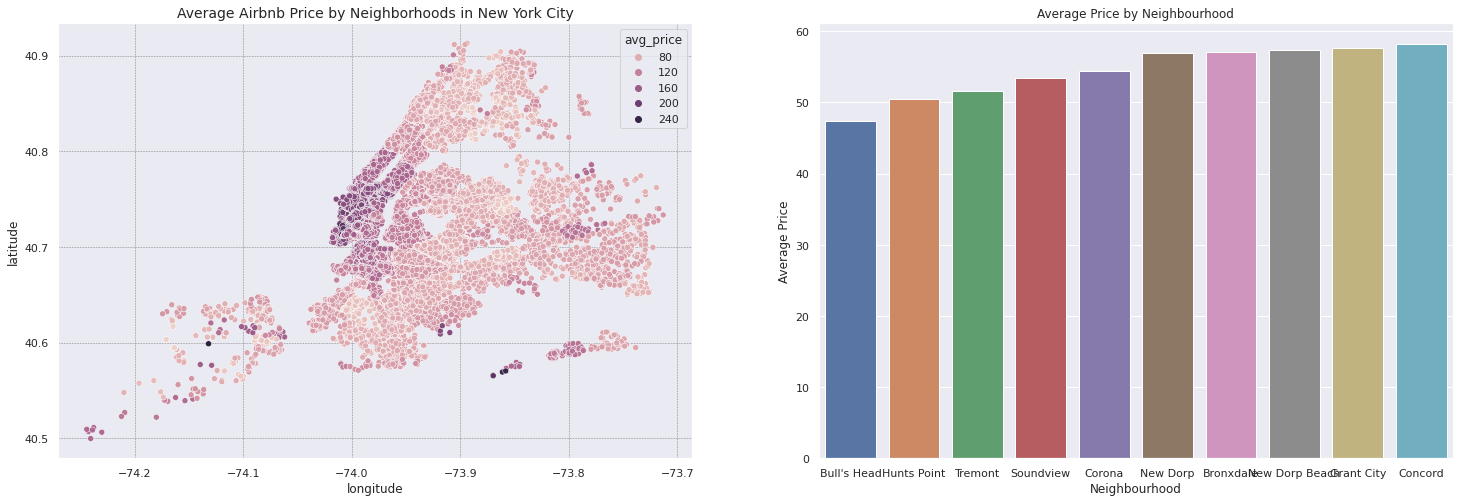

In [48]:
# Set figure size
plt.figure(figsize=(25, 8))

#to find where the coordinates belong from the latitude and longitude
# First subplot - scatterplot
plt.subplot(1, 2, 1)
sns.scatterplot(x=Avgprice_coordinates_df['longitude'], y=Avgprice_coordinates_df['latitude'], hue=Avgprice_coordinates_df['avg_price'], cmap='plasma')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.title('Average Airbnb Price by Neighborhoods in New York City', fontsize='14')

# Visualizing the number of listings in each neighbourhood through bar plot
# Second subplot - barplot
plt.subplot(1, 2, 2)
sns.barplot(x = neighbourhood_avgprice_group['neighbourhood'], y = neighbourhood_avgprice_group['Avg_price'])
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood')

# Show plot
plt.show()

Observations -->

All of the neighborhoods listed are located in the outer boroughs of New York City (Bronx, Queens, and Staten Island). This suggests that these neighborhoods may have a lower overall cost of living compared to neighborhoods in Manhattan and Brooklyn.

Most of these neighborhoods are located in the Bronx and Staten Island. These boroughs tend to have a lower overall cost of living compared to Manhattan and Brooklyn.

These neighborhoods may be attractive to renters or buyers looking for more affordable housing options in the New York City area

## **6. Total Listing/Property count in Each Neighborhood Group**

In [39]:
number_of_airbnb_listed

,Neighbourhood_Groups,Listing_Counts
0,Manhattan,19506
1,Brooklyn,19415
2,Queens,5567
3,Bronx,1070
4,Staten Island,365


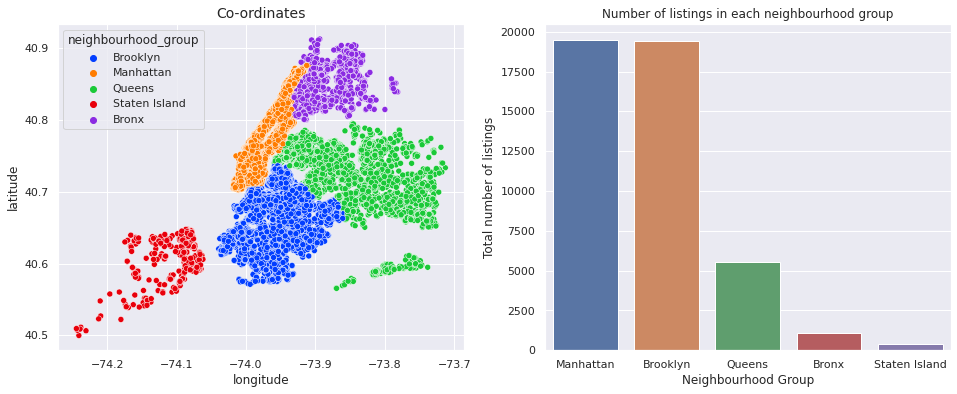

In [40]:
plt.figure(figsize=(16, 6))

# First subplot - scatterplot on neighbourhood_group wrt longitude and latitude
plt.subplot(1, 2, 1)
sns.scatterplot(x=airbnb_df_new['longitude'], y=airbnb_df_new['latitude'], hue=airbnb_df_new['neighbourhood_group'], palette='bright')
plt.title('Co-ordinates', fontsize='14')

# Second subplot - barplot on number of listing in each neighbourhoood_group
plt.subplot(1, 2, 2)
sns.barplot(x = number_of_airbnb_listed['Neighbourhood_Groups'], y = number_of_airbnb_listed['Listing_Counts'])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total number of listings')
plt.title('Number of listings in each neighbourhood group')

# Show plot
plt.show()

Observations -->

Manhattan and Brooklyn have the highest number of listings on Airbnb, with over 19,000 listings each.

Queens and the Bronx have significantly fewer listings compared to Manhattan and Brooklyn, with 5,567 and 1,070 listings, respectively

Staten Island has the fewest number of listings, with only 365.

The distribution of listings across the different neighborhood groups is skewed, with a concentration of listings in Manhattan and Brooklyn.

Despite being larger in size, the neighborhoods in Queens, the Bronx, and Staten Island have fewer listings on Airbnb compared to Manhattan, which has a smaller geographical area.

This could suggest that the demand for Airbnb rentals is higher in Manhattan compared to the other neighborhoods, leading to a higher concentration of listings in this area.

Alternatively, it could be that the supply of listings is higher in Manhattan due to a higher number of homeowners or property owners in this neighborhood who are willing to list their properties on Airbnb.

## **7. Top 10 Neighborhoods by Listing/property**

In [43]:
top_neighborhoods

,Top_Neighbourhoods,Listing_Counts
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1144


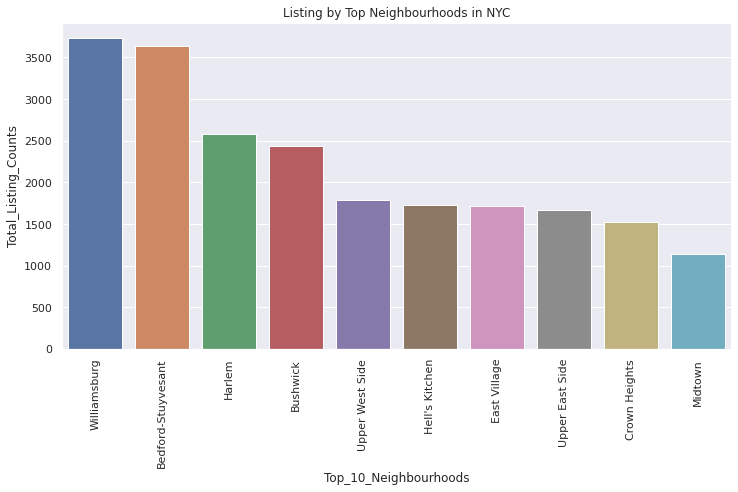

In [46]:
# visualizing the top 10 neighbourhoods having more listing/property using bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x = top_neighborhoods['Top_Neighbourhoods'], y = top_neighborhoods['Listing_Counts'])
plt.xlabel('Top_10_Neighbourhoods')
plt.ylabel('Total_Listing_Counts')
plt.title('Listing by Top Neighbourhoods in NYC')
plt.xticks(rotation=90)

plt.show()

Observations -->

The top neighborhoods in New York City in terms of listing counts are Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and the Upper West Side.

The top neighborhoods are primarily located in Brooklyn and Manhattan. This may be due to the fact that these boroughs have a higher overall population and a higher demand for housing.

The number of listings alone may not be indicative of the overall demand for housing in a particular neighborhood, as other factors such as the cost of living and the availability of housing may also play a role.



## **8. Top Hosts With More Listing/Property**

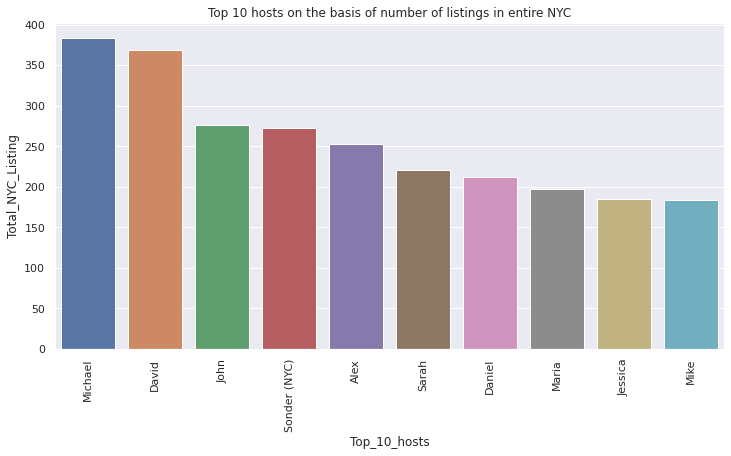

In [45]:
#visualizing the top hosts having most listing/property using bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x = top_10_hosts['host_name'], y = top_10_hosts['Total_listings'])
plt.xlabel('Top_10_hosts')
plt.ylabel('Total_NYC_Listing')
plt.title('Top 10 hosts on the basis of number of listings in entire NYC')
plt.xticks(rotation=90)

plt.show()

Observations -->

The top three hosts in terms of total listings are Michael, David, and John, who have 383, 368, and 276 listings, respectively.

There is a relatively large gap between the top two hosts and the rest of the hosts. For example, john has 276 listings, which is significantly fewer than Michael's 383 listings.

In this top10 list Mike has 184 listings, which is significantly fewer than Michael's 383 listings. This could indicate that there is a lot of variation in the success of different hosts on Airbnb.

There are relatively few hosts with a large number of listings. This could indicate that the Airbnb market is relatively competitive, with a small number of hosts dominating a large portion of the market.

## **9. Number Of Active Hosts in each neighbourhood group**

In [47]:
hosts_per_location

,neighbourhood_group,Host_counts
2,Manhattan,19506
1,Brooklyn,19415
3,Queens,5567
0,Bronx,1070
4,Staten Island,365


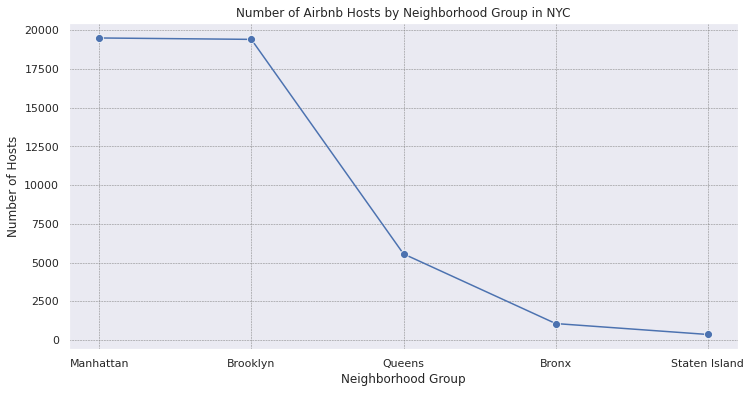

In [49]:
#visualizing the number of active hosts in each neighbourhood group
 
plt.figure(figsize=(12, 6))

sns.lineplot(x=hosts_per_location['neighbourhood_group'], y=hosts_per_location['Host_counts'], marker='o', markersize=8)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.title('Number of Airbnb Hosts by Neighborhood Group in NYC')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Hosts')
plt.show()

Observations -->

Manhattan has the largest number of hosts with 19501,Brooklyn has the second largest number of hosts with 19415.

After that Queens with 5567 and the Bronx with 1070. while Staten Island has the fewest with 365.

Brooklyn and Manhattan have the largest number of hosts, with more than double the number of hosts in Queens and more than 18 times the number of hosts in the Bronx.

## **10. Total Counts Of Each Room Type in NYC**

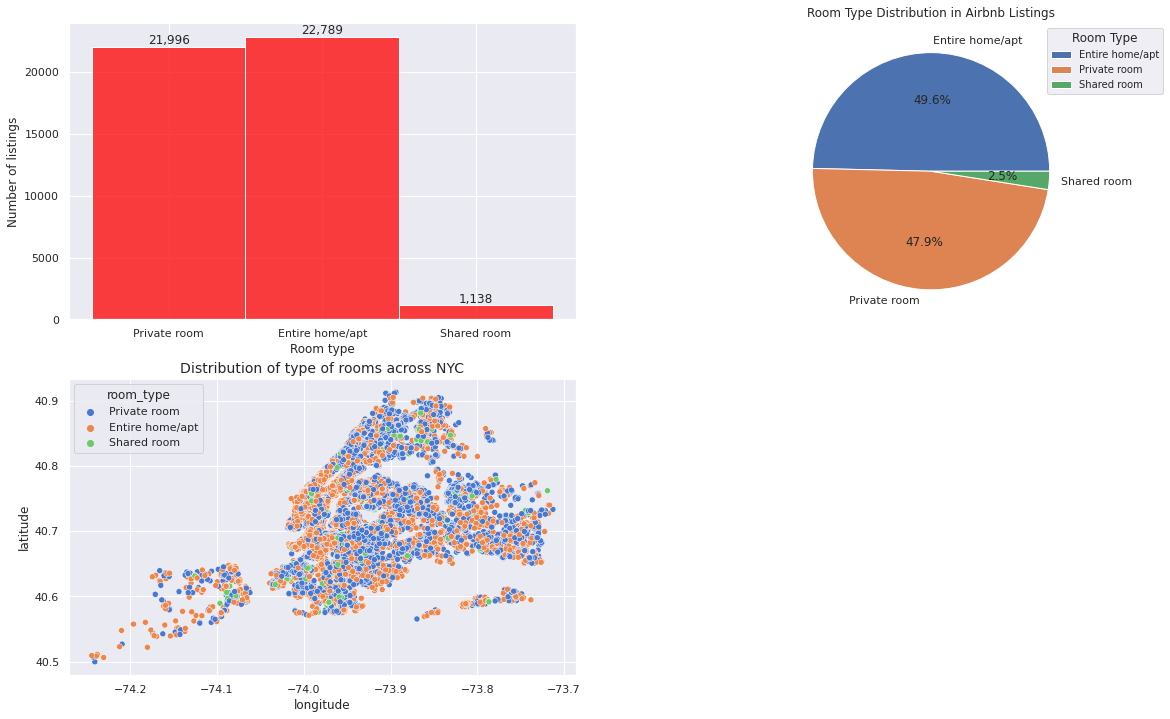

In [43]:
#visualizing the total count of each room type in NYC using different plots
plt.figure(figsize=(20,12))

#first subplot- histogram for room_type
plt.subplot(2,2,1)
hp = sns.histplot(airbnb_df_new['room_type'], color= 'red')
hp.set_xlabel('Room type') 
hp.set_ylabel('Number of listings')

for p in hp.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    hp.text(x, y, f'{y:,}', ha='center', va='bottom')
  

# second subplot- pie plot
plt.subplot(2,2,2)

room_type_counts = airbnb_df_new['room_type'].value_counts()

plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.legend(title= 'Room Type', bbox_to_anchor=(0.8, 0, 0.5, 1), fontsize='10')
plt.title('Room Type Distribution in Airbnb Listings')

# third plot- scatter plot for Distribution of room type accross NYC
plt.subplot(2,2,3)
sns.scatterplot(x=airbnb_df_new['longitude'], y=airbnb_df_new['latitude'], hue = airbnb_df_new['room_type'], palette='muted')
plt.title('Distribution of type of rooms across NYC', fontsize='14')

plt.show()

Observations -->

The majority of listings on Airbnb are for entire homes or apartments, with 22784 listings, followed by private rooms with 21996 listings, and shared rooms with 1138 listings.

There is a significant difference in the number of listings for each room type. For example, there are almost 20 times as many listings for entire homes or apartments as there are for shared rooms.

The data suggests that travelers using Airbnb have a wide range of accommodation options to choose from, including private rooms and entire homes or apartments

## **11. Total Reviews on Each Neighborhood Group**

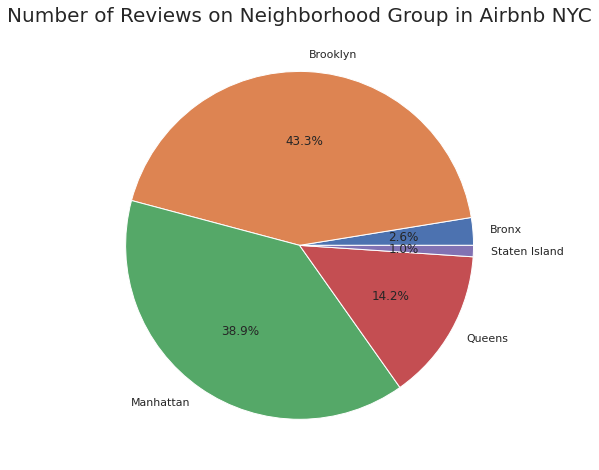

In [44]:
#visualizing the total reviews on each neighbourhood group
plt.figure(figsize=(10,8))

# Create a pie chart
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')
plt.title("Number of Reviews on Neighborhood Group in Airbnb NYC", fontsize='20')

# Display the chart
plt.show()

Observations -->

Brooklyn has the largest share of total reviews on Airbnb, with 43.3%, followed by Manhattan with 38.9%.

Queens has the third largest share of total reviews, with 14.2%, followed by the Bronx with 2.6% and Staten Island with 1.0%.

The data suggests that Airbnb is more popular in Brooklyn and Manhattan compared to the other neighborhood groups.

Despite having fewer listings, Brooklyn has more reviews on Airbnb compared to Manhattan. This could indicate that Airbnb users in Brooklyn are more likely to leave reviews, or that the listings in Brooklyn are more popular or successful in generating positive reviews. It is worth noting that there could be a number of other factors that could contribute to this difference in reviews, such as the quality of the listings or the characteristics of the travelers who use Airbnb in these areas

## **12. Count Of Each Room Types In Entire Airbnb NYC**

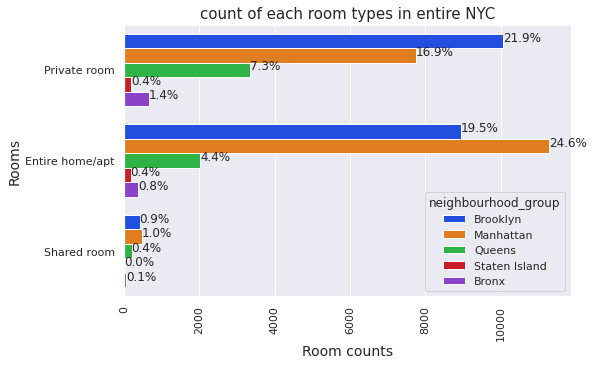

In [45]:
# Visualizing the count of each room type in entire Airbnb NYC

plt.figure(figsize=(8,5))


ax = sns.countplot(y='room_type', hue='neighbourhood_group', data=airbnb_df_new, palette='bright')
total = len(airbnb_df_new['room_type'])
# Add percentage labels to each bar in the plot
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC', fontsize='15')
plt.xlabel('Room counts', fontsize='14')
plt.xticks(rotation=90)
plt.ylabel('Rooms', fontsize='14')

plt.show()

Observations -->

Manhattan has more listed properties with Entire home/apt around 24.6% of total listed properties followed by Brooklyn with around 19.5%.

Private rooms are more in Brooklyn as in 21.9% of the total listed properties followed by Manhattan with 16.9% of them. While 7.3% of private rooms are from Queens.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

## **13. Minimum night stay requirement**

In [46]:
#visualizing the minimum night stay requirement once the room is booked in Airbnb NYC
data

,minimum_night_cat,count
2,2-3 days,18455
8,one day,12067
3,few days,6566
0,1 month,3493
4,less than 1 month,2705
1,1 week,1951
5,more than a month,578
7,more than half year,95
6,more than a year,13


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

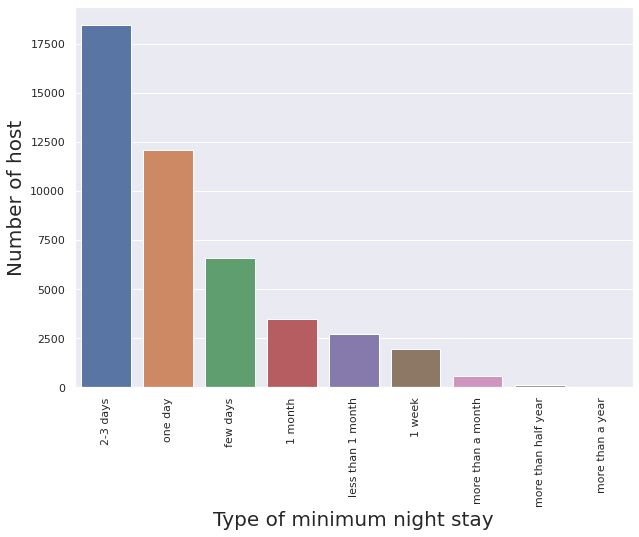

In [55]:
plt.figure(figsize=(10,7))
sns.barplot(x=data['minimum_night_cat'], y=data['count'])
plt.xlabel('Type of minimum night stay', fontsize='20')
plt.ylabel('Number of host',fontsize='20')
plt.xticks(rotation=90)

Most of the host provide only one day minimum night stay, we can say that most of the one night stay occurs in manhatten and in brooklyn these trips based on thier minimum night stay can be buisness trips 

The majority of listings on Airbnb have a minimum stay requirement of 1 or 2 nights, with 12067 and 11080 listings, respectively.

The number of listings with a minimum stay requirement decreases as the length of stay increases, with 7375 listings requiring a minimum stay of 3 nights, and so on.

There are relatively few listings with a minimum stay requirement of 30 nights or more, with 3489 and 189 listings, respectively.

## **14. Availability of room types in entire Airbnb NYC**

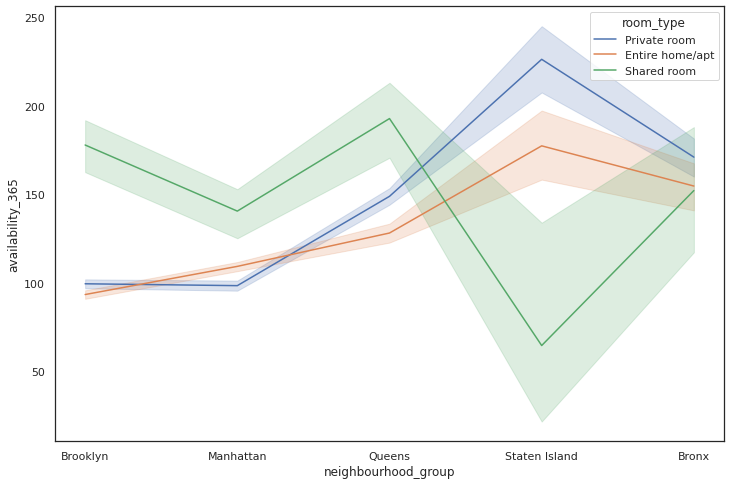

In [76]:
# visualizing the room types available in entire NYC
plt.figure(figsize=(12,8))
sns.lineplot(x=airbnb_df_new['neighbourhood_group'],y= airbnb_df_new['availability_365'],hue=airbnb_df_new['room_type'])

1. Why did you pick the specific chart?

Line chart is used to show the trend line of the categarical variable using the numerical variable. in our case we are seeing the trend line in the neighbourhood regarding the availablity of the room

2. What is/are the insight(s) found from the chart?

Brooklyn and manhattan are busied host for the private room and entire home/apt

Staten island is the most busied for the shared room and it as more available room in private room and entrie home.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Customers in Brooklyn, Manhattan and Bronx tend to avoid shared rooms and prefer private or homes/apartments, while customers in Staten Island prefer shared rooms over private or homes/apartments.

we could offer promotions or discounts for shared rooms in Brooklyn, Manhattan, and Bronx, and for private or homes/apt in Staten Island. This strategy would help you to attract different target audiences and increase the occupancy rate in each area.

## **15. Pair Plot Visualization**

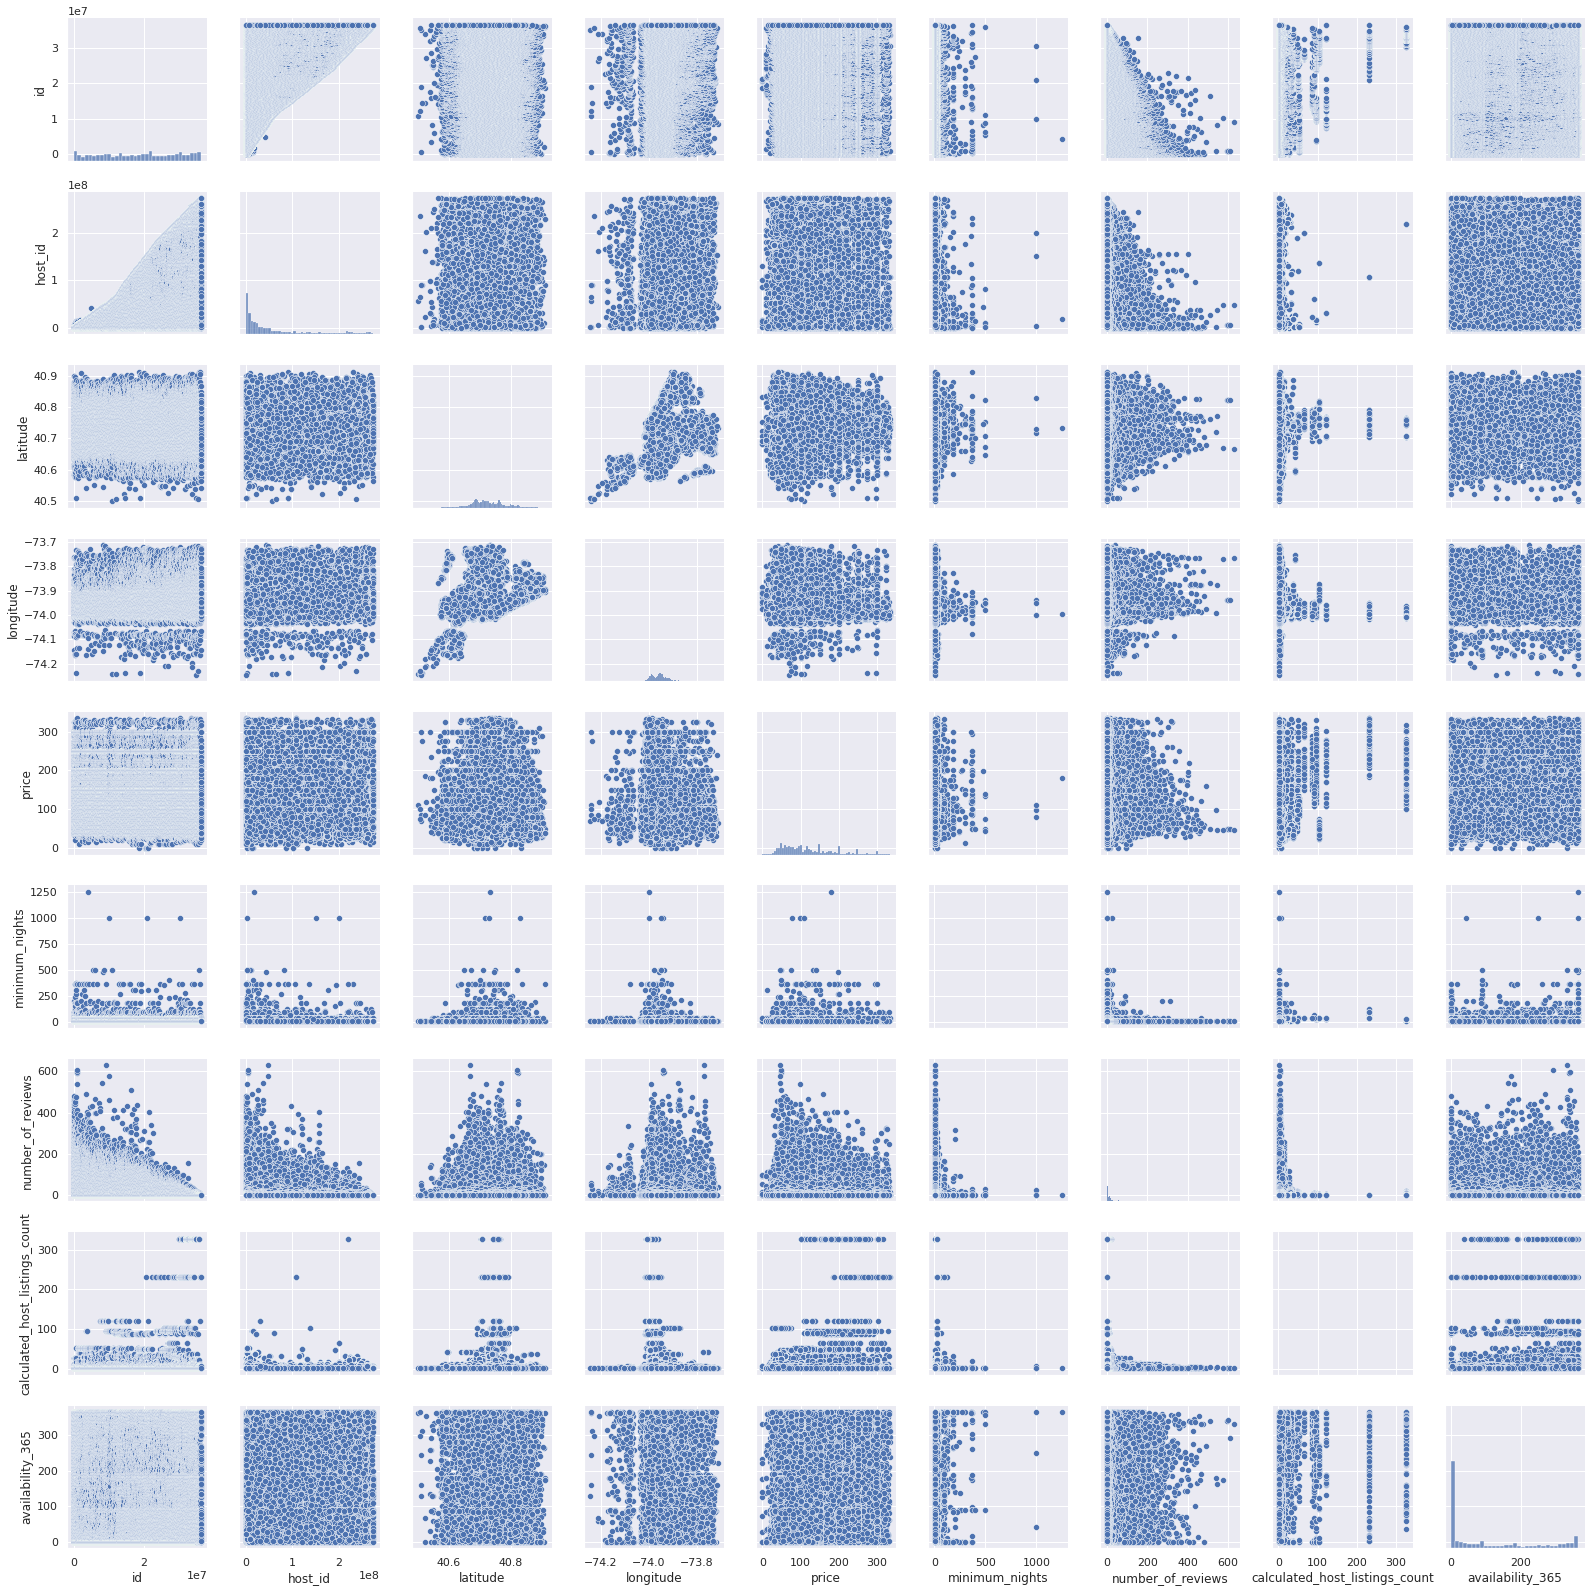

In [69]:
# create a pairplot using the seaborn library to visualize the relationships between different variables in the Airbnb NYC dataset
sns.pairplot(airbnb_df_new)

plt.show()

A pair plot consists of multiple scatterplots arranged in a grid, with each scatterplot showing the relationship between two variables

It can be used to visualize relationships between multiple variables and to identify patterns in the data.

**BUSINESS CONCLUSION :-**

Manhattan and Brooklyn have the highest demand for Airbnb rentals, as evidenced by the large number of listings in these neighborhoods. This could make them attractive areas for hosts to invest in property.

Manhattan is world-famous for its parks, museums, buildings, town, liberty, gardens, markets, island and also its substantial number of tourists throughout the year ,it makes sense that demand and price both high.

Brooklyn comes in second with significant number of listings and cheaper prices as compared to the Manhattan: With most listings located in Williamsburg and Bedford Stuyvesant two neighborhoods strategically close to Manhattan tourists get the chance to enjoy both boroughs equally while spending less.

Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and the Upper West Side are the top neighborhoods in terms of listing counts, indicating strong demand for Airbnb rentals in these areas.

The average price of a listing in New York City is higher in the center of the city (Manhattan) compared to the outer boroughs. This could indicate that investing in property in Manhattan may be more lucrative for Airbnb rentals. But Manhattan and Brooklyn have the largest number of hosts, indicating a high level of competition in these boroughs.

The data suggests that Airbnb rentals are primarily used for short-term stays, with relatively few listings requiring a minimum stay of 30 nights or more. Hosts may want to consider investing in property that can accommodate shorter stays in order to maximize their occupancy rate.

The majority of listings on Airbnb are for entire homes or apartments and also Private Rooms with relatively fewer listings for shared rooms. This suggests that travelers using Airbnb have a wide range of accommodation options to choose from, and hosts may want to consider investing in property that can accommodate multiple guests.

The data indicates that the availability of Airbnb rentals varies significantly across neighborhoods, with some neighborhoods having a high concentration of listings and others having relatively few.

The data indicates that there is a high level of competition among Airbnb hosts, with a small number of hosts dominating a large portion of the market. Hosts may want to consider investing in property in areas with relatively fewer listings in order to differentiate themselves from the competition.

The neighborhoods near the airport in Queens would have a higher average number of reviews, as they are likely to attract a lot of tourists or visitors who are passing through the area. The proximity to the airport could make these neighborhoods a convenient and appealing place to stay for travelers for short-term stay with spending less money because The price distribution is high in Manhattan and Brooklyn.